# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:/Users/nahuc/Desktop/code/Python/Udemy/Data Science y Machine Learning/Día 9/Cuadernos para Prácticas/Datos Meteorológicos_Arg_2023.csv")
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [5]:
#### 2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior. ####

In [7]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")
df["Fecha"]

0      2023-01-01
1      2023-01-01
2      2023-01-01
3      2023-01-01
4      2023-01-01
          ...    
1820   2023-12-31
1821   2023-12-31
1822   2023-12-31
1823   2023-12-31
1824   2023-12-31
Name: Fecha, Length: 1825, dtype: datetime64[ns]

In [9]:
#### 3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año. ####

In [11]:
ciudades = df["Ciudad"].drop_duplicates()
ciudades
meses = df['Fecha'].dt.month_name(locale='es_ES').drop_duplicates()
meses

0            Enero
155        Febrero
295          Marzo
450          Abril
600           Mayo
755          Junio
905          Julio
1060        Agosto
1215    Septiembre
1365       Octubre
1520     Noviembre
1670     Diciembre
Name: Fecha, dtype: object

In [13]:
def selec_ciudad(ciudades):
    selec_ciudad = input(f"Seleccione la ciudad que desea consultar y este disponible: \n{ciudades} ")
    return selec_ciudad
    
def selec_mes(meses):
    selec_mes = input(f"Seleccione el mes que desea: {meses}")
    return selec_mes



In [15]:
#### 4.Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.

In [17]:
# Filtrar las ciudades y fechas según lo que seleccione el usuario
def grafico(ciudad_mes):
    y = ciudad_mes["Fecha"]
    x_max = ciudad_mes["Temperatura Maxima"]
    x_min = ciudad_mes["Temperatura Minima"]
    
    plt.figure(figsize=(10, 6))  # Tamaño opcional para la figura
    plt.plot(y, x_max, label='Temperatura Máxima', marker='o')  # Graficar la temperatura máxima
    plt.plot(y, x_min, label='Temperatura Mínima', marker='o')  # Graficar la temperatura mínima
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura')
    plt.title(f'Temperaturas en {ciudad.capitalize()} durante {mes.capitalize()}')
    plt.legend()  # Mostrar leyenda con etiquetas de línea
    plt.grid(True)  # Mostrar cuadrícula en el gráfico
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.tight_layout();  # Ajustar el diseño para evitar que se recorten las etiquetas




In [19]:
#### 5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no. ####

Seleccione la ciudad que desea consultar y este disponible: 
0    Buenos Aires
1         Cordoba
2         Rosario
3         Mendoza
4         Tucuman
Name: Ciudad, dtype: object  Mendoza
Seleccione el mes que desea: 0            Enero
155        Febrero
295          Marzo
450          Abril
600           Mayo
755          Junio
905          Julio
1060        Agosto
1215    Septiembre
1365       Octubre
1520     Noviembre
1670     Diciembre
Name: Fecha, dtype: object Julio


Eligió la ciudad: Mendoza y el mes: Julio


¿Desea realizar otra consulta? (S/N):  N


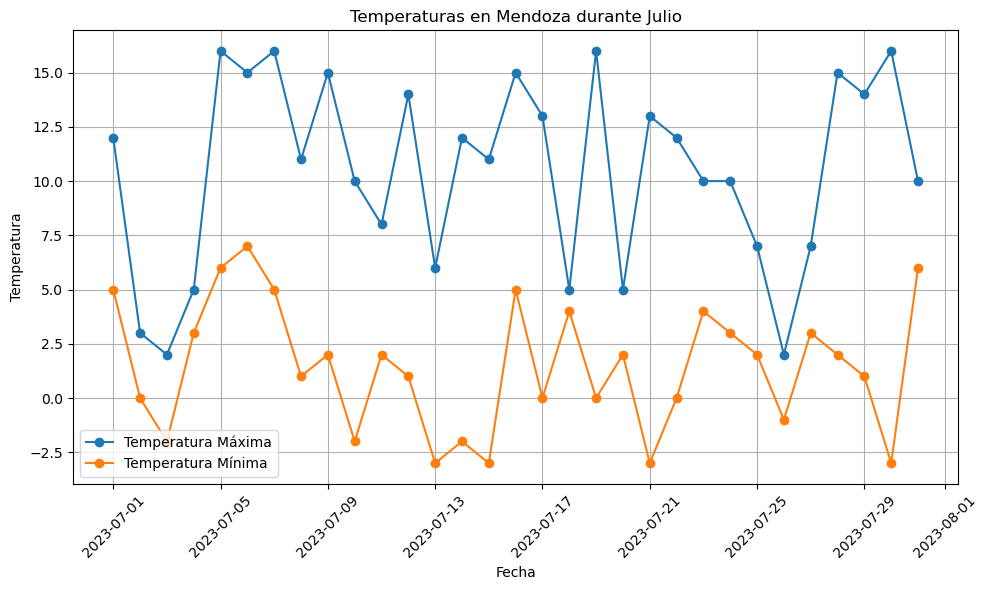

In [23]:
while True:
    ciudad = selec_ciudad(ciudades)
    ciudad = ciudad.capitalize()

    mes = selec_mes(meses)
    mes = mes.capitalize()
    
    print(f"Eligió la ciudad: {ciudad} y el mes: {mes}")

    # Filtrar datos según la ciudad y el mes seleccionados
    ciudad_mes = df.loc[(df["Ciudad"] == ciudad) & (df["Fecha"].dt.month_name(locale='es_ES') == mes)]
    
    # Verificar si se encontraron datos para la consulta
    if ciudad_mes.empty:
        print(f"No se encontraron datos para {ciudad} en {mes}. Intente de nuevo.")
        continue

    # Llamar a la función para graficar
    grafico(ciudad_mes)

    # Preguntar al usuario si desea realizar otra consulta
    seguir = input("¿Desea realizar otra consulta? (S/N): ")
    if seguir.upper() == "N":
        break
